In [1]:
import os
import numpy as np
import xarray as xr
import pandas as pd
import seaborn as sns
import geopandas as gpd

import cartopy.crs as ccrs

from matplotlib import patches
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import sys
sys.path.append(os.path.abspath(".."))
from function import ART_downscale as ART_down
from function import ART_preprocessing as ART_pre

import warnings
warnings.filterwarnings('ignore')

In [2]:
npix = 5
yy_s, yy_e = 2002, 2012
year_vector = np.arange(yy_s, yy_e+1)
years_num = yy_e - yy_s + 1
lon_min, lon_max, lat_min, lat_max = 10.5, 13.5, 44.5, 47

In [3]:
dir_base = os.path.join('/','media','arturo','Arturo','Data','Italy')

In [111]:
veneto_dir = os.path.join('/','media','arturo','Arturo','Data','shapes','Europa','Italy')

if os.path.exists(veneto_dir):
    VENETO = gpd.read_file(os.path.join(veneto_dir,'Veneto.geojson'))
    DEM = gpd.read_file(os.path.join(veneto_dir,'Veneto_DEM_500.geojson'))
else:
    raise SystemExit(f"File not found: {veneto_dir}")

In [5]:
OBS_base = os.path.join(dir_base,'stations','data','Veneto','BACKUP_RAW')
OBS_INFO_dir = os.path.join(os.path.join(OBS_base),'VENETO_INFO_1dy.csv')

if os.path.exists(OBS_INFO_dir):
    INFO_pd = pd.read_csv(OBS_INFO_dir, sep=',')
else:
    raise SystemExit(f"File not found: {OBS_INFO_dir}")

In [6]:
names, lats, lons, yys, yye, nys, Ns, Cs, Ws = [], [], [], [], [], [], [], [], []

for nn in range(len(INFO_pd)):
    filename = f'{INFO_pd['File_Name'].values[nn]}.csv'
    RAIN_pd = pd.read_csv(os.path.join(OBS_base, 'CLEAR_1dy', filename), sep=',')
    RAIN_pd['TIME'] = pd.to_datetime(RAIN_pd['TIME'].values)
    ss, ee = RAIN_pd['TIME'][0].year, RAIN_pd['TIME'][len(RAIN_pd['TIME'])-1].year
    ny = (ee-ss)+1

    RAIN_filtered = RAIN_pd[
        (RAIN_pd['TIME'].dt.year >= 2002) & 
        (RAIN_pd['TIME'].dt.year <= 2012)]

    if len(RAIN_filtered) > 2000:
        yys_new = pd.to_datetime(RAIN_filtered['TIME'].values[0]).year
        yye_new = pd.to_datetime(RAIN_filtered['TIME'].values[-1]).year

        names.append(INFO_pd['File_Name'].values[nn])
        lats.append(INFO_pd['Lat'].values[nn])
        lons.append(INFO_pd['Lon'].values[nn])
        yys.append(yys_new)
        yye.append(yye_new)
        nys.append(ny)

METADATA = pd.DataFrame({
            'File_Name':names, 
            'Lat':lats, 'Lon':lons, 
            'YYS':yys, 'YYE':yye, 'NY':nys})

In [7]:
names, lats, lons, Q10, Q20, Q50, Q100 = [], [], [], [], [], [], []
for nn in range(len(INFO_pd)):
    filename = f'{INFO_pd['File_Name'].values[nn]}.csv'
    RAIN_pd = pd.read_csv(os.path.join(OBS_base, 'CLEAR_1dy', filename), sep=',')
    RAIN_pd['TIME'] = pd.to_datetime(RAIN_pd['TIME'].values)
    ss, ee = RAIN_pd['TIME'][0].year, RAIN_pd['TIME'][len(RAIN_pd['TIME'])-1].year
    ny = (ee-ss)+1

    RAIN_filtered = RAIN_pd[
        (RAIN_pd['TIME'].dt.year >= yy_s) & 
        (RAIN_pd['TIME'].dt.year <= yy_e)]

    if len(RAIN_filtered) > 2000:
        RAIN_xr = xr.DataArray(
                    RAIN_filtered['PRE'].values,
                    coords={'time':RAIN_filtered['TIME'].values}, 
                    dims=('time'))

        NCW = ART_down.fit_yearly_weibull_update(RAIN_xr,1)
        N = NCW[:,0]
        C = NCW[:,1]
        W = NCW[:,2]

        Tr = [10, 20, 50, 100]
        Fi = 1 - 1/np.array(Tr)
        x0 = np.nanmean(C)
        TMP_Q, _ = ART_down.mev_quant(Fi, x0, N, C, W, thresh=1)

        names.append(INFO_pd['File_Name'].values[nn])
        lats.append(INFO_pd['Lat'].values[nn])
        lons.append(INFO_pd['Lon'].values[nn])
        Q10.append(TMP_Q[0])
        Q20.append(TMP_Q[1])
        Q50.append(TMP_Q[2])
        Q100.append(TMP_Q[3])

    wa_pd = pd.DataFrame({
                    'File_Name':names, 
                    'Lat':lats, 
                    'Lon':lons, 
                    'Q10':Q10,
                    'Q20':Q20,
                    'Q50':Q50,
                    'Q100':Q100})

mev_quant:: ERROR - fsolve does not work - change x0
mev_quant:: ERROR - fsolve does not work - change x0
mev_quant:: ERROR - fsolve does not work - change x0
mev_quant:: ERROR - fsolve does not work - change x0
mev_quant:: ERROR - fsolve does not work - change x0
mev_quant:: ERROR - fsolve does not work - change x0
mev_quant:: ERROR - fsolve does not work - change x0
mev_quant:: ERROR - fsolve does not work - change x0
mev_quant:: ERROR - fsolve does not work - change x0
mev_quant:: ERROR - fsolve does not work - change x0
mev_quant:: ERROR - fsolve does not work - change x0
mev_quant:: ERROR - fsolve does not work - change x0
mev_quant:: ERROR - fsolve does not work - change x0
mev_quant:: ERROR - fsolve does not work - change x0
mev_quant:: ERROR - fsolve does not work - change x0
mev_quant:: ERROR - fsolve does not work - change x0
mev_quant:: ERROR - fsolve does not work - change x0
mev_quant:: ERROR - fsolve does not work - change x0
mev_quant:: ERROR - fsolve does not work - cha

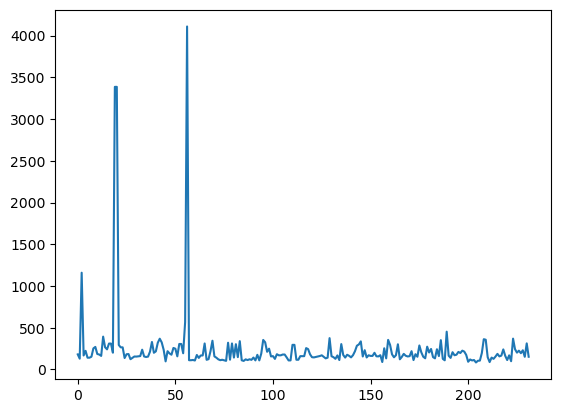

In [8]:
plt.plot(wa_pd['Q50'].values)

In [26]:
# Remove station with strange data
wa_filter =wa_pd[wa_pd['Q50']<500]
wa_filter = wa_filter.reset_index(drop=True)
wa_filter.head(3)

,File_Name,Lat,Lon,Q10,Q20,Q50,Q100
0,002_FG_BS,45.895600,12.815000,132.290433,152.627964,180.347157,202.182683
1,003_BL_Ar,46.499984,11.876073,95.258394,109.507756,128.772213,143.837386
2,004-264_NP_Be,46.164679,12.244708,127.319605,144.233849,166.887672,184.466450


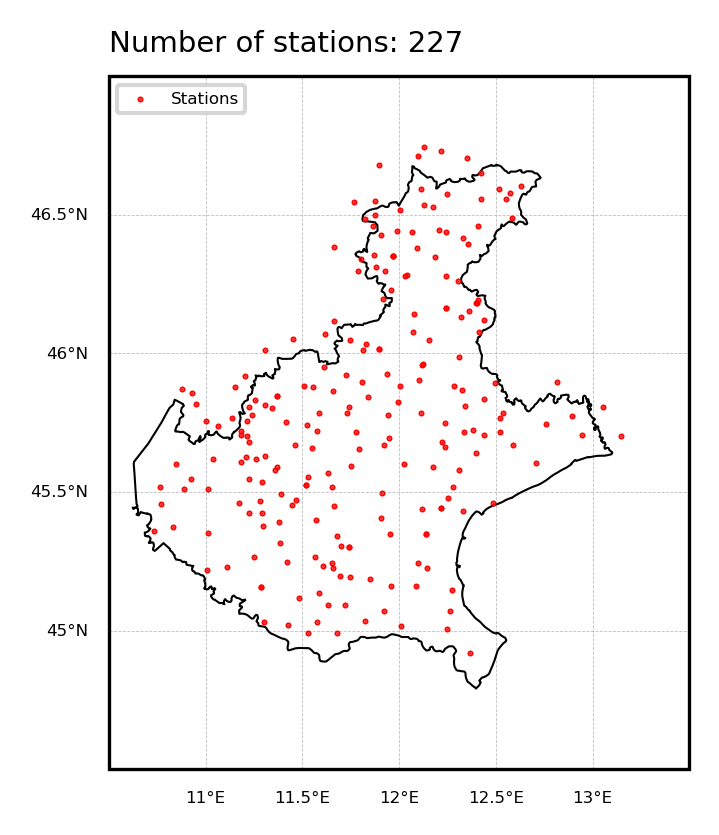

In [10]:
cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(3,3),dpi=300)
gs = gridspec.GridSpec(1,1)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)

ax1.scatter(wa_filter['Lon'].values, wa_filter['Lat'].values, s=0.2, c='r', zorder=20, label='Stations')

plt.legend(fontsize=4, loc=2)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels =True

gl.xlabel_style = {'size': 4, 'color': 'k'}
gl.ylabel_style = {'size': 4, 'color': 'k'}

ax1.set_title(f'Number of stations: {len(wa_filter)}', loc='left', fontsize=7)

ax1.set_facecolor('white')
fig.patch.set_alpha(0)

In [11]:
data_base = os.path.join('/','media','arturo','Arturo','Data','Italy','Satellite')

In [12]:
data_dir = os.path.join(data_base,'3_DOWN','VENETO_DOWN_IMERG_1dy_2002_2012_npix_5.nc')
DATA = xr.open_dataset(data_dir)

lon_IMERG, lat_IMERG  = np.meshgrid(DATA.lon.values, DATA.lat.values)
Tr = DATA['Tr'].values

Q_IMERG = DATA.Quantile.values
del DATA
Q_IMERG.shape

(4, 25, 30)

In [13]:
data_dir = os.path.join(data_base,'3_DOWN','VENETO_DOWN_CMORPH_3h_2002_2012_npix_5.nc')
DATA = xr.open_dataset(data_dir)

lon_CMORPH, lat_CMORPH  = np.meshgrid(DATA.lon.values, DATA.lat.values)

Q_CMORPH = DATA.Quantile.values
del DATA
Q_CMORPH.shape

(4, 10, 12)

In [14]:
data_dir = os.path.join(data_base,'3_DOWN','VENETO_DOWN_MSWEP_3h_2002_2012_npix_5.nc')
DATA = xr.open_dataset(data_dir)

lon_MSWEP, lat_MSWEP  = np.meshgrid(DATA.lon.values, DATA.lat.values)

Q_MSWEP = DATA.Quantile.values
del DATA
Q_MSWEP.shape

(4, 25, 30)

In [15]:
data_dir = os.path.join(data_base,'3_DOWN','VENETO_DOWN_ERA5_3h_2002_2012_npix_5.nc')
DATA = xr.open_dataset(data_dir)

lon_ERA5, lat_ERA5  = np.meshgrid(DATA.lon.values, DATA.lat.values)

Q_ERA5 = DATA.Quantile.values
del DATA
Q_ERA5.shape

(4, 11, 13)

In [16]:
data_dir = os.path.join(data_base,'3_DOWN','VENETO_DOWN_PERSIANN_1dy_2002_2012_npix_5.nc')
DATA = xr.open_dataset(data_dir)

lon_PERSIANN, lat_PERSIANN  = np.meshgrid(DATA.lon.values, DATA.lat.values)

Q_PERSIANN = DATA.Quantile.values
del DATA
Q_PERSIANN.shape

(4, 10, 12)

In [17]:
data_dir = os.path.join(data_base,'3_DOWN','VENETO_DOWN_SM2RAIN_1dy_2007_2012_npix_5.nc')
DATA = xr.open_dataset(data_dir)

lon_SM2RAIN, lat_SM2RAIN  = np.meshgrid(DATA.lon.values, DATA.lat.values)

Q_SM2RAIN = DATA.Quantile.values
# del DATA
Q_SM2RAIN.shape

(4, 26, 31)

In [100]:
# Tr_index, Q_index = 0, 'Q10'
# Tr_index, Q_index = 1, 'Q20'
# Tr_index, Q_index = 2, 'Q50'
Tr_index, Q_index = 3, 'Q100'

colors = ['royalblue','r', 'g', 'c', 'y', 'purple']

In [101]:
E_IMERG, E_CMORPH, E_MSWEP, E_ERA5, E_PERSIANN, E_SM2RAIN = [], [], [], [], [], []
ESEMBLE = []

for nn in range(len(wa_filter)):
    Q_OBS = wa_filter[Q_index][nn]
    lat_obs = wa_filter['Lat'][nn]
    lon_obs = wa_filter['Lon'][nn]

    distances = ART_pre.haversine(lat_IMERG, lon_IMERG, lat_obs, lon_obs)
    min_index = np.unravel_index(np.argmin(distances, axis=None), distances.shape)
    IMERG_val = Q_IMERG[Tr_index,min_index[0],min_index[1]]
    ERROR_ = (Q_OBS - IMERG_val)/Q_OBS
    E_IMERG.append(float(ERROR_))
    
    distances = ART_pre.haversine(lat_CMORPH, lon_CMORPH, lat_obs, lon_obs)
    min_index = np.unravel_index(np.argmin(distances, axis=None), distances.shape)
    CMORPH_val = Q_CMORPH[Tr_index,min_index[0],min_index[1]]
    ERROR_ = (Q_OBS - CMORPH_val)/Q_OBS
    E_CMORPH.append(float(ERROR_))
    
    distances = ART_pre.haversine(lat_MSWEP, lon_MSWEP, lat_obs, lon_obs)
    min_index = np.unravel_index(np.argmin(distances, axis=None), distances.shape)
    MSWEP_val = Q_MSWEP[Tr_index,min_index[0],min_index[1]]
    ERROR_ = (Q_OBS - MSWEP_val)/Q_OBS
    E_MSWEP.append(float(ERROR_))
    
    distances = ART_pre.haversine(lat_ERA5, lon_ERA5, lat_obs, lon_obs)
    min_index = np.unravel_index(np.argmin(distances, axis=None), distances.shape)
    ERA5_val = Q_ERA5[Tr_index,min_index[0],min_index[1]]
    ERROR_ = (Q_OBS - ERA5_val)/Q_OBS
    E_ERA5.append(float(ERROR_))
    
    distances = ART_pre.haversine(lat_PERSIANN, lon_PERSIANN, lat_obs, lon_obs)
    min_index = np.unravel_index(np.argmin(distances, axis=None), distances.shape)
    PERSIANN_val = Q_PERSIANN[Tr_index,min_index[0],min_index[1]]
    ERROR_ = (Q_OBS - PERSIANN_val)/Q_OBS
    E_PERSIANN.append(float(ERROR_))
    
    distances = ART_pre.haversine(lat_SM2RAIN, lon_SM2RAIN, lat_obs, lon_obs)
    min_index = np.unravel_index(np.argmin(distances, axis=None), distances.shape)
    SM2RAIN_val = Q_SM2RAIN[Tr_index,min_index[0],min_index[1]]
    ERROR_ = (Q_OBS - SM2RAIN_val)/Q_OBS
    E_SM2RAIN.append(float(ERROR_))

    SAT_BET_mean = np.nanmean(
                        [IMERG_val,
                        CMORPH_val,
                        MSWEP_val,
                        ERA5_val]
                        )
    ESEMBLE_ = (Q_OBS - SAT_BET_mean)/Q_OBS
    ESEMBLE.append(ESEMBLE_)


Text(1.0, 1.0, '2002 to 2012')

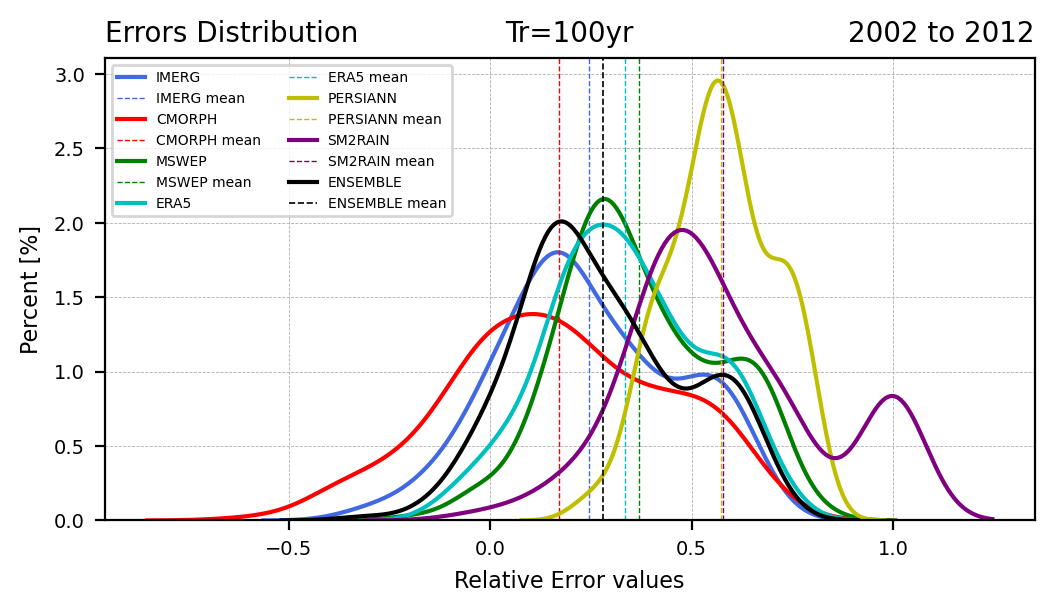

In [115]:
fig = plt.figure(figsize=(6,3),dpi=200)
gs = gridspec.GridSpec(1,1)

# =========================================================================================================================
ax1 = plt.subplot(gs[0, 0])

sns.kdeplot(E_IMERG,color=colors[0],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'IMERG')
ax1.axvline(np.nanmean(E_IMERG), color=colors[0], linestyle='--', linewidth=0.5, label='IMERG mean')

sns.kdeplot(E_CMORPH,color=colors[1],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'CMORPH')
ax1.axvline(np.nanmean(E_CMORPH), color=colors[1], linestyle='--', linewidth=0.5, label='CMORPH mean')

sns.kdeplot(E_MSWEP,color=colors[2],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'MSWEP')
ax1.axvline(np.nanmean(E_MSWEP), color=colors[2], linestyle='--', linewidth=0.5, label='MSWEP mean')

sns.kdeplot(E_ERA5,color=colors[3],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'ERA5')
ax1.axvline(np.nanmean(E_ERA5), color=colors[3], linestyle='--', linewidth=0.5, label='ERA5 mean')

sns.kdeplot(E_PERSIANN,color=colors[4],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'PERSIANN')
ax1.axvline(np.nanmean(E_PERSIANN), color=colors[4], linestyle='--', linewidth=0.5, label='PERSIANN mean')

sns.kdeplot(E_SM2RAIN,color=colors[5],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'SM2RAIN')
ax1.axvline(np.nanmean(E_SM2RAIN), color=colors[5], linestyle='--', linewidth=0.5, label='SM2RAIN mean')

sns.kdeplot(ESEMBLE,color='k',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'ENSEMBLE')
ax1.axvline(np.nanmean(ESEMBLE), color='k', linestyle='--', linewidth=0.6, label='ENSEMBLE mean')

ax1.set_ylabel('Percent [%]',fontsize=8)
ax1.set_xlabel('Relative Error values',fontsize=8)
ax1.legend(fontsize=5, loc=0, ncol=2)
ax1.grid(linewidth=0.3, linestyle='--')
ax1.tick_params(axis='both', which='major', labelsize=7)
ax1.set_title('Errors Distribution', fontsize=10, loc='left')
ax1.set_title(f'Tr={Tr[Tr_index]}yr',fontsize=10, loc='Center')
ax1.set_title(f'{yy_s} to {yy_e}',fontsize=10, loc='right')

Text(1.0, 1.0, '2002 to 2012')

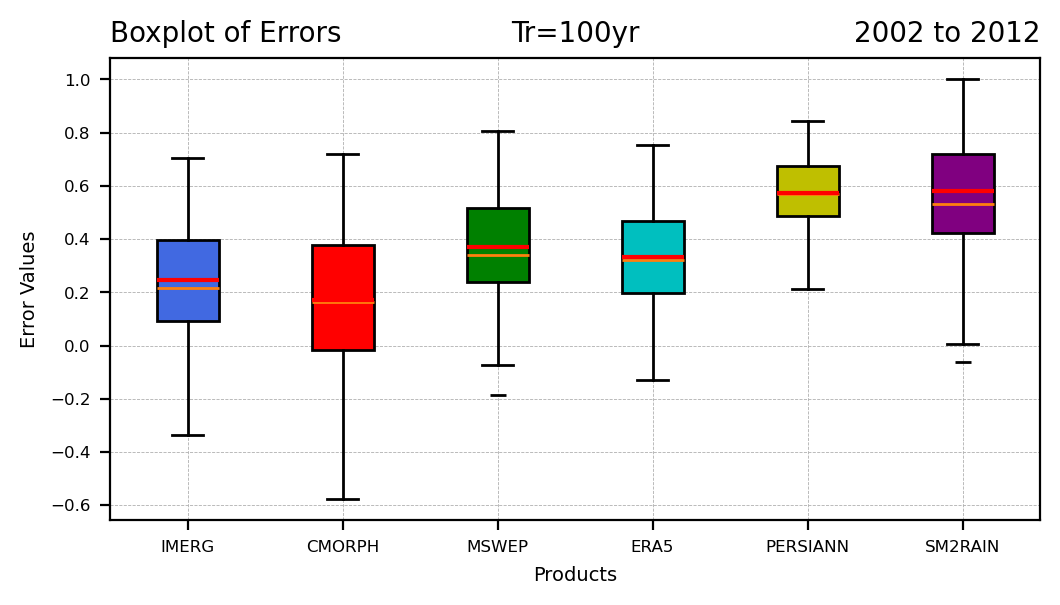

In [114]:
fig = plt.figure(figsize=(6,3),dpi=200)
gs = gridspec.GridSpec(1,1)

boxes = []
medians = []
mean = []
fliers = []

# =========================================================================================================================
ax1 = plt.subplot(gs[0, 0])

box = ax1.boxplot(E_IMERG,positions=[0],vert=True,
    widths=0.4,boxprops=dict(facecolor=colors[0],color='k'),
    showmeans=True,meanline=True,meanprops=dict(linestyle='-',color="r",linewidth=1.5),
    showfliers=True,flierprops=dict(marker='_',color='k',linewidth=1.5),
    patch_artist=True,notch=False)

box = ax1.boxplot(E_CMORPH,positions=[1],vert=True,
    widths=0.4,boxprops=dict(facecolor=colors[1],color='k'),
    showmeans=True,meanline=True,meanprops=dict(linestyle='-',color="r",linewidth=1.5),
    showfliers=True,flierprops=dict(marker='_',color='k',linewidth=1.5),
    patch_artist=True,notch=False)

box = ax1.boxplot(E_MSWEP,positions=[2],vert=True,
    widths=0.4,boxprops=dict(facecolor=colors[2],color='k'),
    showmeans=True,meanline=True,meanprops=dict(linestyle='-',color="r",linewidth=1.5),
    showfliers=True,flierprops=dict(marker='_',color='k',linewidth=1.5),
    patch_artist=True,notch=False)

box = ax1.boxplot(E_ERA5,positions=[3],vert=True,
    widths=0.4,boxprops=dict(facecolor=colors[3],color='k'),
    showmeans=True,meanline=True,meanprops=dict(linestyle='-',color="r",linewidth=1.5),
    showfliers=True,flierprops=dict(marker='_',color='k',linewidth=1.5),
    patch_artist=True,notch=False)

box = ax1.boxplot(E_PERSIANN,positions=[4],vert=True,
    widths=0.4,boxprops=dict(facecolor=colors[4],color='k'),
    showmeans=True,meanline=True,meanprops=dict(linestyle='-',color="r",linewidth=1.5),
    showfliers=True,flierprops=dict(marker='_',color='k',linewidth=1.5),
    patch_artist=True,notch=False)

box = ax1.boxplot(np.array(E_SM2RAIN)[~np.isnan(E_SM2RAIN)],positions=[5],vert=True,
    widths=0.4,boxprops=dict(facecolor=colors[5],color='k'),
    showmeans=True,meanline=True,meanprops=dict(linestyle='-',color="r",linewidth=1.5),
    showfliers=True,flierprops=dict(marker='_',color='k',linewidth=1.5),
    patch_artist=True,notch=False)

ax1.set_xticks([0,1,2,3,4,5])
ax1.set_xticklabels(['IMERG','CMORPH','MSWEP','ERA5','PERSIANN','SM2RAIN'])
ax1.tick_params(axis='both', which='major', labelsize=6)
ax1.set_xlabel('Products',fontsize=7)
ax1.set_ylabel('Error Values',fontsize=7)
ax1.grid(linewidth=0.3, linestyle='--')
ax1.set_title('Boxplot of Errors', fontsize=10, loc='left')
ax1.set_title(f'Tr={Tr[Tr_index]}yr',fontsize=10, loc='Center')
ax1.set_title(f'{yy_s} to {yy_e}',fontsize=10, loc='right')

In [105]:
E_IMERG_M = np.ones_like(Q_IMERG[0,:,:])*np.nan
E_CMORPH_M = np.ones_like(Q_CMORPH[0,:,:])*np.nan
E_MSWEP_M = np.ones_like(Q_MSWEP[0,:,:])*np.nan
E_ERA5_M = np.ones_like(Q_ERA5[0,:,:])*np.nan
E_PERSIANN_M = np.ones_like(Q_PERSIANN[0,:,:])*np.nan
E_SM2RAIN_M = np.ones_like(Q_SM2RAIN[0,:,:])*np.nan

for nn in range(len(wa_filter)):
    Q_OBS = wa_filter[Q_index][nn]
    lat_obs = wa_filter['Lat'][nn]
    lon_obs = wa_filter['Lon'][nn]

    distances = ART_pre.haversine(lat_IMERG, lon_IMERG, lat_obs, lon_obs)
    min_index = np.unravel_index(np.argmin(distances, axis=None), distances.shape)
    E_IMERG_M[min_index[0],min_index[1]] = 100*(Q_OBS - Q_IMERG[Tr_index,min_index[0],min_index[1]])/Q_OBS

    distances = ART_pre.haversine(lat_CMORPH, lon_CMORPH, lat_obs, lon_obs)
    min_index = np.unravel_index(np.argmin(distances, axis=None), distances.shape)
    E_CMORPH_M[min_index[0],min_index[1]] = 100*(Q_OBS - Q_CMORPH[Tr_index,min_index[0],min_index[1]])/Q_OBS

    distances = ART_pre.haversine(lat_MSWEP, lon_MSWEP, lat_obs, lon_obs)
    min_index = np.unravel_index(np.argmin(distances, axis=None), distances.shape)
    E_MSWEP_M[min_index[0],min_index[1]] = 100*(Q_OBS - Q_MSWEP[Tr_index,min_index[0],min_index[1]])/Q_OBS

    distances = ART_pre.haversine(lat_ERA5, lon_ERA5, lat_obs, lon_obs)
    min_index = np.unravel_index(np.argmin(distances, axis=None), distances.shape)
    E_ERA5_M[min_index[0],min_index[1]] = 100*(Q_OBS - Q_ERA5[Tr_index,min_index[0],min_index[1]])/Q_OBS

    distances = ART_pre.haversine(lat_PERSIANN, lon_PERSIANN, lat_obs, lon_obs)
    min_index = np.unravel_index(np.argmin(distances, axis=None), distances.shape)
    E_PERSIANN_M[min_index[0],min_index[1]] = 100*(Q_OBS - Q_PERSIANN[Tr_index,min_index[0],min_index[1]])/Q_OBS

    distances = ART_pre.haversine(lat_SM2RAIN, lon_SM2RAIN, lat_obs, lon_obs)
    min_index = np.unravel_index(np.argmin(distances, axis=None), distances.shape)
    E_SM2RAIN_M[min_index[0],min_index[1]] = 100*(Q_OBS - Q_SM2RAIN[Tr_index,min_index[0],min_index[1]])/Q_OBS

In [106]:
products = ['CMORPH', 'ERA5', 'IMERG', 'PERSIANN', 'MSWEP', 'SM2RAIN']
letter = ['(a)','(d)', '(b)', '(e)', '(c)', '(f)']

In [107]:
import matplotlib.colors as mcolors

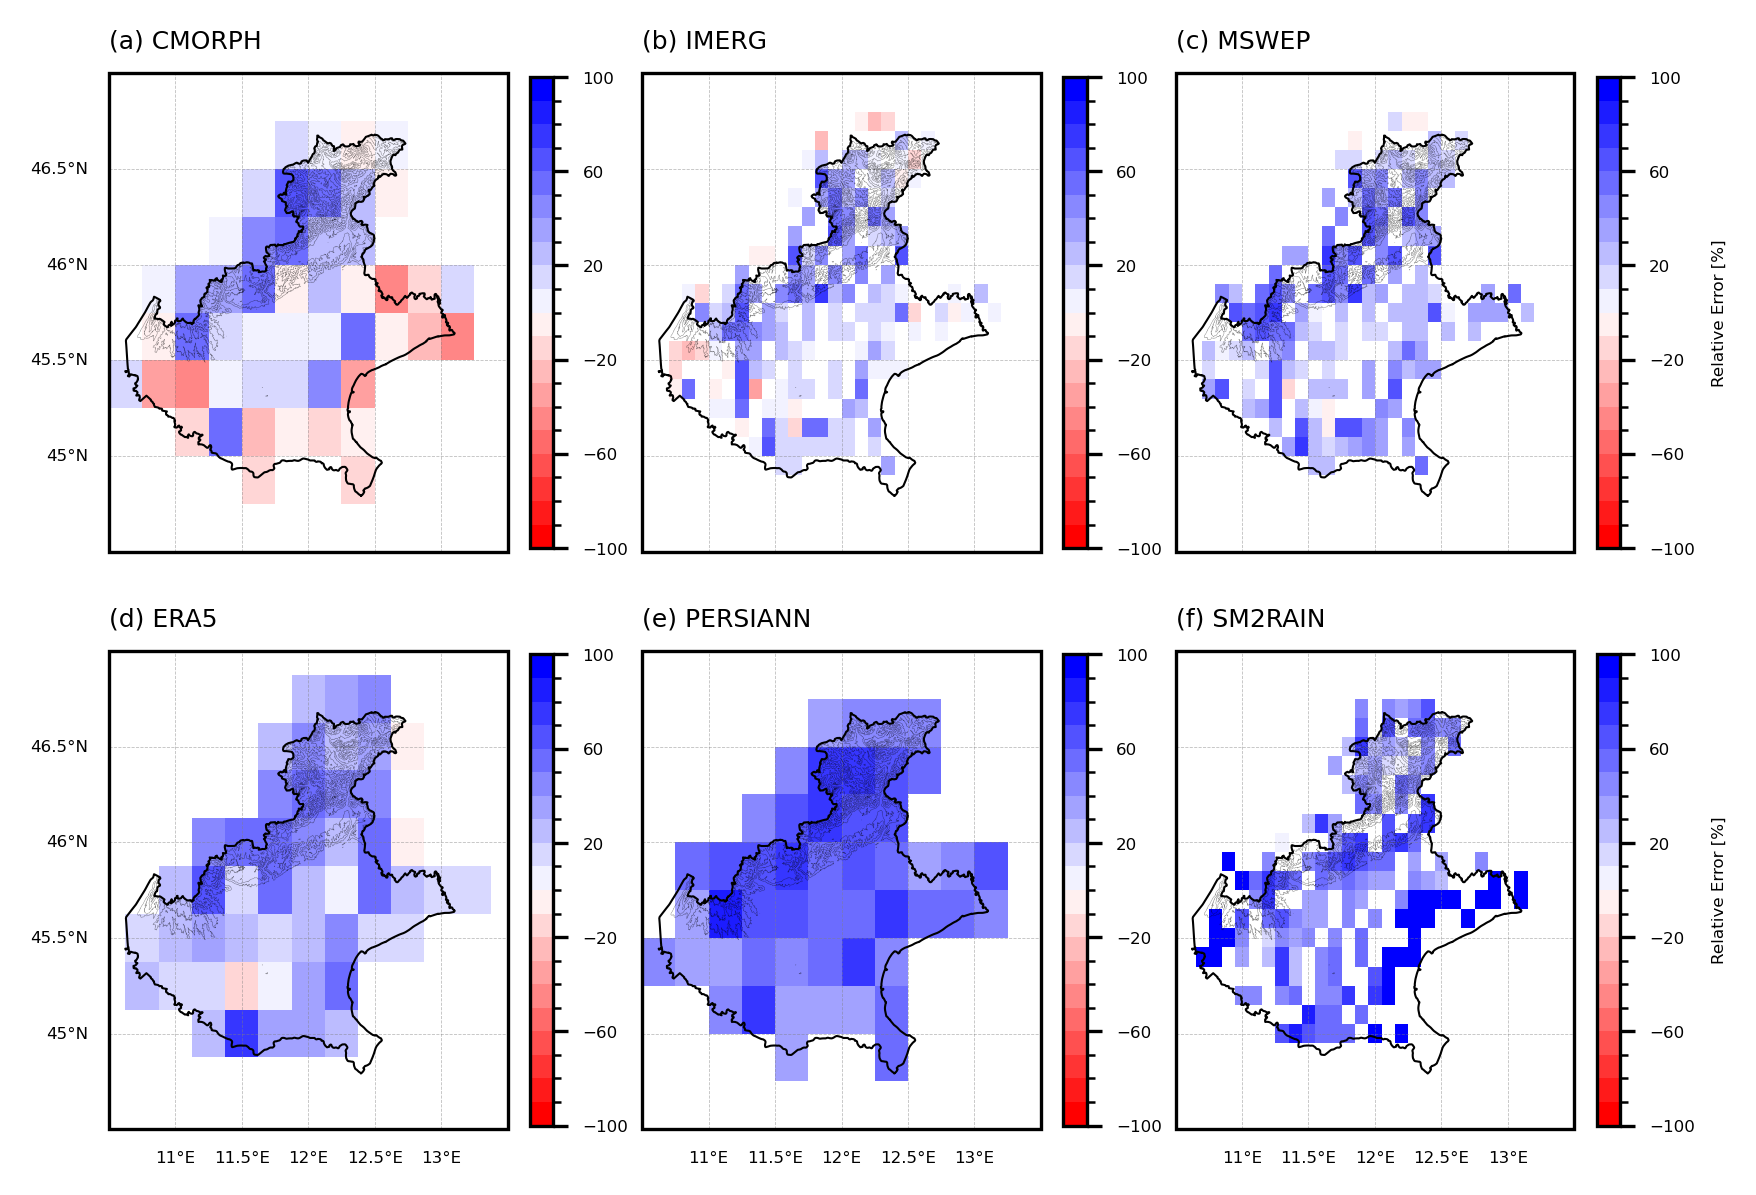

In [118]:
# levels = np.arange(-1.0,1.2,0.2)
# norm = mcolors.BoundaryNorm(boundaries=levels, ncolors=256)
# ticks = np.arange(-1,1.4,0.4)

levels = np.arange(-100,110,10)
norm = mcolors.BoundaryNorm(boundaries=levels, ncolors=256)
ticks = np.arange(-100,140,40)

cmap = plt.cm.Spectral_r
cmap = plt.cm.bwr_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(6.5,5),dpi=300)
gs = gridspec.GridSpec(2,3)

# ==============================================================================
pos = 0
count = 1
for ncol in range(3):
    for nrow in range(2):
        ax_name = f"ax{count}"
        globals()[ax_name] = plt.subplot(gs[nrow, ncol], projection=proj)
        globals()[ax_name].set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
        VENETO.plot(facecolor='None', ax=globals()[ax_name], linewidth=0.5, zorder=10)
        DEM.plot(facecolor='None', ax=globals()[ax_name], zorder=10, linewidth=0.1, color='k', alpha=0.5)

        a1 = globals()[ax_name].pcolormesh(
                                    globals()[f"lon_{products[pos]}"], 
                                    globals()[f"lat_{products[pos]}"], 
                                    globals()[f"E_{products[pos]}_M"], 
                                    cmap=cmap,norm=norm)

        gl = globals()[ax_name].gridlines(crs=proj,draw_labels=False,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
        if ncol == 0:
            gl.left_labels = True
        else:
            gl.left_labels = False
        if nrow == 0:
            gl.bottom_labels = False
        else:
            gl.bottom_labels = True
        gl.xlabel_style = {'size': 4, 'color': 'k'}
        gl.ylabel_style = {'size': 4, 'color': 'k'}

        globals()[ax_name].set_title(f"{letter[pos]} {products[pos]}", fontsize=6, loc='left')
        cbar = plt.colorbar(a1, ticks=ticks, fraction=0.053)
        cbar.set_label('Relative Error [%]',fontsize=4)
        cbar.ax.tick_params(labelsize=4)

        count += 1
        pos += 1
# ==============================================================================

# ax1.set_title(f'Relative Error', fontsize=6, loc='right')

plt.subplots_adjust(wspace=0.2, hspace=0)
